# parse the debian med metadata provided by Steffen in the local edam.json file

In [12]:
import json
debian_med_metadata = json.load(open('edam.json'))
print(len(debian_med_metadata))
for entry in debian_med_metadata:
    print(entry['package'],entry['bio.tools'], entry['doi'])
biotools_linked_packages = [entry for entry in debian_med_metadata if entry['bio.tools'] is not None]
print(len(biotools_linked_packages))
print(len([entry['doi'] for entry in debian_med_metadata]))

872
abacas None 10.1093/bioinformatics/btp347
abyss ABySS 10.1101/gr.089532.108
acacia None 10.1038/nmeth.1990
acedb-other dotter 10.1109/5992.764215
adapterremoval None 10.1186/s13104-016-1900-2
adun.app None 10.1002/jcc.20312
adun-core None 10.1002/jcc.20312
aegean None 10.1186/1471-2105-13-187
aevol None None
alien-hunter None 10.1093/bioinformatics/btl369
alter-sequence-alignment alter 10.1093/nar/gkq321
altree None 10.1093/bioinformatics/btl131
amap-align None 10.1093/bioinformatics/btl311
amos-assembler amos 10.1093/bib/bbr074
hawkeye amos 10.1093/bib/bbr074
ampliconnoise pyronoise 10.1186/1471-2105-12-38
andi andi 10.1093/bioinformatics/btu815
anfo None None
apollo ApolloGenAnnotCuratTool 10.1186/gb-2002-3-12-research0082
aragorn None 10.1093/nar/gkh152
arb None None
arden None 10.1093/bioinformatics/btt255
ariba None 10.1099/mgen.0.000131
artemis artemis 10.1093/bioinformatics/btr703
artfastqgenerator None 10.1371/journal.pone.0049110
art-nextgen-simulation-tools None 10.1093/b

smrtanalysis SMRT_Analysis None
snakemake None 10.1093/bioinformatics/bts480
snap SNAP 10.1186/1471-2105-5-59
snap-aligner None None
sniffles None 10.1101/169557
snpeff None 10.4161/fly.19695
snpomatic SNP-o-matic 10.1093/bioinformatics/btp403
libsnp-sites1-dev None 10.1099/mgen.0.000056
snp-sites None 10.1099/mgen.0.000056
soapaligner SOAPaligner 10.1093/bioinformatics/btn025
soapdenovo soapdenovo 10.1101/gr.097261.109
soapdenovo2 soapdenovo 10.1186/2047-217X-1-18
soapsnp soapsnp 10.1101/gr.088013.108
solvate None None
sortmerna sortmerna 10.1093/bioinformatics/bts611
sourmash None 10.21105/joss.0002
spaced None 10.1186/s13015-015-0032-x
spades Spades 10.1089/cmb.2012.0021
sparta None 10.1186/s12859-016-0923-y
libspoa-dev None None
spoa None None
sprai None None
spread-phy None 10.1093/bioinformatics/btr481
squizz None None
sra-toolkit SRA_toolkit 10.1093/nar/gkp998
libsrf-dev None None
srst2 None 10.1186/s13073-014-0090-6
ssaha None None
ssake ssake 10.1093/bioinformatics/btl629
libs

# retrieve the bio.tools metadata and store them in a local biotools.json file

In [27]:
import requests
biotools_list = []
next_biotools_page = '?page=1'
print('retrieving the bio.tools data, please wait...')
while next_biotools_page is not None:
    page = requests.get('https://bio.tools/api/tool/?format=json&' + next_biotools_page[1:]).json()
    biotools_list += page['list']
    next_biotools_page = page.get('next',None)
json.dump(biotools_list,open('biotools.json','w'))
print('done!')

getting page page=1
getting page page=2
getting page page=3
getting page page=4
getting page page=5
getting page page=6
getting page page=7
getting page page=8
getting page page=9
getting page page=10
getting page page=11
getting page page=12
getting page page=13
getting page page=14
getting page page=15
getting page page=16
getting page page=17
getting page page=18
getting page page=19
getting page page=20
getting page page=21
getting page page=22
getting page page=23
getting page page=24
getting page page=25
getting page page=26
getting page page=27
getting page page=28
getting page page=29
getting page page=30
getting page page=31
getting page page=32
getting page page=33
getting page page=34
getting page page=35
getting page page=36
getting page page=37
getting page page=38
getting page page=39
getting page page=40
getting page page=41
getting page page=42
getting page page=43
getting page page=44
getting page page=45
getting page page=46
getting page page=47
getting page page=48
g

getting page page=379
getting page page=380
getting page page=381
getting page page=382
getting page page=383
getting page page=384
getting page page=385
getting page page=386
getting page page=387
getting page page=388
getting page page=389
getting page page=390
getting page page=391
getting page page=392
getting page page=393
getting page page=394
getting page page=395
getting page page=396
getting page page=397
getting page page=398
getting page page=399
getting page page=400
getting page page=401
getting page page=402
getting page page=403
getting page page=404
getting page page=405
getting page page=406
getting page page=407
getting page page=408
getting page page=409
getting page page=410
getting page page=411
getting page page=412
getting page page=413
getting page page=414
getting page page=415
getting page page=416
getting page page=417
getting page page=418
getting page page=419
getting page page=420
getting page page=421
getting page page=422
getting page page=423
getting pa

getting page page=752
getting page page=753
getting page page=754
getting page page=755
getting page page=756
getting page page=757
getting page page=758
getting page page=759
getting page page=760
getting page page=761
getting page page=762
getting page page=763
getting page page=764
getting page page=765
getting page page=766
getting page page=767
getting page page=768
getting page page=769
getting page page=770
getting page page=771
getting page page=772
getting page page=773
getting page page=774
getting page page=775
getting page page=776
getting page page=777
getting page page=778
getting page page=779
getting page page=780
getting page page=781
getting page page=782
getting page page=783
getting page page=784
getting page page=785
getting page page=786
getting page page=787
getting page page=788
getting page page=789
getting page page=790
getting page page=791
getting page page=792
getting page page=793
getting page page=794
getting page page=795
getting page page=796
getting pa

getting page page=1119
getting page page=1120
getting page page=1121
getting page page=1122
getting page page=1123
getting page page=1124
getting page page=1125
getting page page=1126
getting page page=1127
getting page page=1128
getting page page=1129
getting page page=1130
getting page page=1131
getting page page=1132
getting page page=1133
getting page page=1134
getting page page=1135
getting page page=1136
getting page page=1137
getting page page=1138
getting page page=1139
getting page page=1140
getting page page=1141
getting page page=1142
getting page page=1143
getting page page=1144
getting page page=1145
getting page page=1146
getting page page=1147
getting page page=1148
getting page page=1149
getting page page=1150
getting page page=1151
getting page page=1152
getting page page=1153
getting page page=1154
getting page page=1155
getting page page=1156
getting page page=1157
getting page page=1158
getting page page=1159
getting page page=1160
getting page page=1161
getting pag

TypeError: 'NoneType' object is not subscriptable

# create dataframes to store these data

In [95]:
import pandas
from pandas.io.json import json_normalize
biotools_df = json_normalize(biotools_list)
# lowercase version of bio.tools ID in bio.tools dataframe
biotools_df['bt_id_lc'] = biotools_df['biotoolsID'].str.lower()
# lowercase version of debian ID in debian dataframe
debian_df = pandas.read_json('edam.json', orient='values')
debian_df['db_id_lc'] = debian_df['bio.tools'].str.lower()
merged_df = biotools_df.merge(debian_df, how='right', left_on='bt_id_lc', right_on='db_id_lc', suffixes=('_biotools', '_debian'))
print(merged_df.columns)
#merged_df = merged_df[['bio.tools','package','doi','publication']]
merged_df = merged_df[['bt_id_lc', 'db_id_lc', 'bio.tools','doi','publication','package','biotoolsID']]
print(merged_df[merged_df.db_id_lc.notnull()][merged_df.biotoolsID.isnull()])
print(merged_df[merged_df.db_id_lc.notnull()][merged_df.biotoolsID.isnull()].shape[0])


Index(['accessibility', 'additionDate', 'biotoolsCURIE', 'biotoolsID',
       'collectionID', 'cost', 'credit', 'description_biotools',
       'documentation', 'download', 'editPermission.authors',
       'editPermission.type', 'elixirNode', 'elixirPlatform', 'elixir_badge',
       'function', 'homepage_biotools', 'homepage_status', 'language',
       'lastUpdate', 'license', 'link', 'maturity', 'name', 'operatingSystem',
       'otherID', 'owner', 'publication', 'toolType', 'topic', 'validated',
       'version_biotools', 'bt_id_lc', 'OMICtools', 'RRID', 'SEQwiki',
       'SciCrunch', 'bio.tools', 'biology', 'component', 'description_debian',
       'distribution', 'doi', 'edam_scopes', 'fields', 'homepage_debian',
       'interface', 'long_description', 'package', 'popcon', 'release',
       'source', 'topics', 'use', 'version_debian', 'db_id_lc'],
      dtype='object')
    bt_id_lc                  db_id_lc                 bio.tools  \
856      NaN   apollogenannotcurattool   Apollo

/home/hmenager/biotools-debian-join/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/hmenager/biotools-debian-join/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# print the number of entries in debian with a bio.tools ID and the number that have a corresponding bio.tools entry based on reference publications

In [155]:
# find potential debian med entries which have not yet been mapped to bio.tools entries
debian_df_bydoi = debian_df.set_index('doi')
intersection_id = set()
intersection_doi = set()
debian_new_biotools_links = []
entries = []
for idx, row in biotools_df.iterrows():
    if row['bt_id_lc'] in debian_df['db_id_lc'].values:
        intersection_id.add(row['bt_id_lc'])
    else:
        for pub in row['publication']:
            if pub['doi'] and pub['doi'] in debian_df_bydoi.index and debian_df_bydoi.loc[pub['doi']]['db_id_lc'] is None:
                intersection_doi.add(row['bt_id_lc'])
                debian_new_biotools_links.append({'bio.tools': row['bt_id_lc'], 'debian': debian_df_bydoi.loc[pub['doi']]['package']})
print(len(intersection_id), len(intersection_doi))
for entry in debian_new_biotools_links:
    print("bio.tools: " + entry['bio.tools'] + "-> debian: " + entry['debian'])

248 418
bio.tools: inspect_ms-> debian: inspect
bio.tools: massxpert-> debian: msxpertsuite
bio.tools: htseqcount-> debian: python-htseq
bio.tools: uniprot.ws-> debian: r-bioc-biocgenerics
bio.tools: htseq-> debian: python-htseq
bio.tools: ray-> debian: ray
bio.tools: spp-> debian: r-other-hms-dbmi-spp
bio.tools: pyfaidx-> debian: python3-pyfaidx
bio.tools: mach-> debian: mach-haplotyper
bio.tools: hisat2-> debian: hisat2
bio.tools: sparta-> debian: sparta
bio.tools: rapmap-> debian: rapmap
bio.tools: seqcluster-> debian: python3-seqcluster
bio.tools: biocgenerics-> debian: r-bioc-biocgenerics
bio.tools: variantannotation-> debian: r-bioc-variantannotation
bio.tools: predictionet-> debian: r-bioc-biocgenerics
bio.tools: biomart-> debian: r-bioc-biomart
bio.tools: bioconductor-> debian: r-bioc-biocgenerics
bio.tools: psichomics-> debian: r-bioc-biocgenerics
bio.tools: gene.e-> debian: r-bioc-biocgenerics
bio.tools: mash-> debian: mash
bio.tools: a4reporting-> debian: r-bioc-biocgenerics

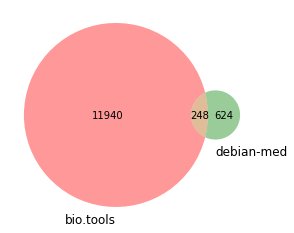

In [135]:
%matplotlib inline
from matplotlib_venn import venn2
venn2(subsets=(len(biotools_df)-len(intersection_id), len(debian_df)-len(intersection_id), len(intersection_id)), set_labels = ('bio.tools', 'debian-med', 'overlap'))

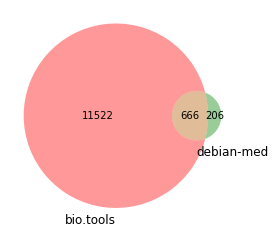

In [136]:
venn2(subsets=(len(biotools_df)-(len(intersection_id)+len(intersection_doi)), len(debian_df)-(len(intersection_id)+len(intersection_doi)), len(intersection_id)+len(intersection_doi)), set_labels = ('bio.tools', 'debian-med', 'overlap'))
